# Experiment 2

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import json

class data_storage:
    b = np.array([]);
    l = np.array([]);
    t = np.array([]);
    v = np.array([]);
    d = np.array([]);
    g = np.array([]);
    s = np.array([]);
    c = np.array([]);

def extract_data( TXTpath ):
    X = data_storage()
    Cb = 0;
    Ct = 0;
    with open(TXTpath) as f:
        line = f.readline()
        while line:
            line = f.readline()
            if( line[0:2] == ".b" ):
                Cb+=1;
                X.b = np.append(X.b, int(line[2:]))
            if( line[0:2] == ".g" ):
                X.g = np.append(X.g, int(line[3:]))        
            if( line[0:2] == ".s" ):
                X.s = np.append(X.s, int(line[3:]))
            if( line[0:2] == ".c" ):
                X.c = np.append(X.c, float(line[3:]))
            if( line[0:2] == ".d" ):
                X.d = np.append(X.d, int(line[3:]))
            if( line[0:2] == ".l" ):
                X.l = np.append(X.l,float(line[3:]))
            if( line[0:2] == ".t" ):
                Ct+=1;
                X.t = np.append(X.t,float(line[3:]))
                if( Cb != Ct ):
                    print(X.b[Cb-1])
            if( line[0:2] == ".v" ):
                X.v = np.append(X.v,float(line[3:]))
            
    return X
    
D1 = extract_data( 'ixtsdec2/RES/summary.txt' )
D2 = extract_data( 'armuesli/RES/summary.txt' )
D3 = extract_data( 'argmuesli/RES/summary.txt' )

f = open ('ixtsdec2/ixtsdec2.json', "r")
D1j = json.loads(f.read())

f = open ('armuesli/armuesli.json', "r")
D2j = json.loads(f.read())

f = open ('argmuesli/argmuesli.json', "r")
D3j = json.loads(f.read())

D1r = [D1j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D2r = [D2j[0]["entries"][j]["runtime"] for j in range(0,99,1)]
D3r = [D3j[0]["entries"][j]["runtime"] for j in range(0,99,1)]


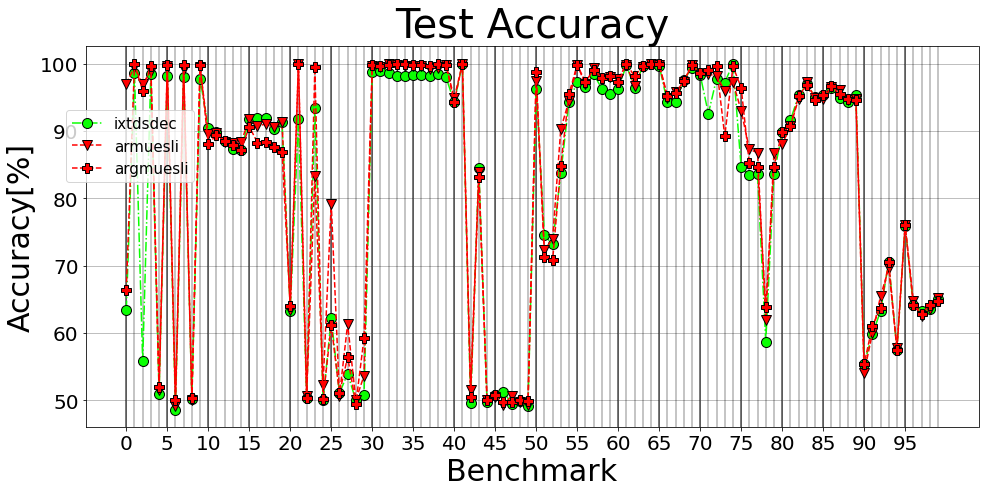

In [11]:
#import matplotlib.font_manager

fig = plt.figure(figsize=(16,7))
ax = plt.gca()
plt.xticks(range(0,100,5), fontsize=50)
for b in range(0,100,1):
    plt.axvline(x=b, color='k', alpha = 0.3)
for b in range(0,100,5):
    plt.axvline(x=b, color='k', alpha = 0.5)
plt.grid()
#lineSD, = ax.plot(SD.b, SD.t , 's', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 20, label = 'SD')
#lineISD, = ax.plot(ISD.b, ISD.t , 'D', c='blue', alpha=1, markeredgecolor='k', markersize = 18 , label = 'ISD')
#lineIDSD, = ax.plot(IDSD.b, IDSD.t, 'o', c='white', alpha=1, markeredgecolor='k', markersize = 16, label = 'IDSD')
#linearMUESLI, = ax.plot(arMUESLI.b, arMUESLI.t, '*', c='red', alpha=1, markeredgecolor='k', markersize = 15, label = 'arMUESLI')
#linedcIDSD, = ax.plot(dcIDSD.b, dcIDSD.t, 'P', c='k', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')
#lineRASS, = ax.plot(rass.b, rass.t, 'o', c='gold', alpha=1, markeredgecolor='k', markersize = 11, label = 'dcDSD')

line1, = ax.plot(D1.b, D1.t , '-.o', c='#0aff02', alpha=1, markeredgecolor='k', markersize = 10, label = 'ixtdsdec')
line2, = ax.plot(D2.b, D2.t , '--v', c='r', alpha=1, markeredgecolor='k', markersize = 10 , label = 'armuesli')
line3, = ax.plot(D3.b, D3.t , '--P', c='r', alpha=1, markeredgecolor='k', markersize = 10 , label = 'argmuesli')

ax.legend( handles = [line1, line2, line3], fontsize=15, bbox_to_anchor=(0.09, 0.75, 0.04, .102)) #,

plt.rcParams["font.family"] = "sans"
plt.xlabel('Benchmark', fontsize=30)
plt.ylabel('Accuracy[%]', fontsize=30)
plt.title('Test Accuracy', fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('acc.png')

In [12]:
from tabulate import tabulate
def extract_row_data( X, runtime, label ):
    return [label, np.mean(X.l),np.mean(X.t), np.mean(X.g), np.mean(X.d), np.mean(X.v-X.t), np.mean(runtime)]

row1 = extract_row_data( D1, D1r, "ixtdsdes")
row2 = extract_row_data( D2, D2r, "armuesli")
row3 = extract_row_data( D3, D3r, "argmuesli")

#row5 = extract_row_data( dcIDSD, runtimedcIDSD, "dcIDSD" )

#row2 = ["I-DSD",np.mean(t2), np.mean(g2), np.mean(s2), np.mean(d2), np.mean(np.abs(t2-v2))];
table = [ row1, row2, row3 ] #row2
print(tabulate(table, headers = ["method","train accuracy[%]","test accuracy[%]","And gates","levels","overfit[%]","time[s]"], tablefmt="github"))

| method    |   train accuracy[%] |   test accuracy[%] |   And gates |   levels |   overfit[%] |   time[s] |
|-----------|---------------------|--------------------|-------------|----------|--------------|-----------|
| ixtdsdes  |             99.9952 |            82.3489 |     1545.99 |    29.52 |      17.6453 |   42.1581 |
| armuesli  |             99.9952 |            83.9712 |     1492.46 |    60.43 |      16.023  |  721.315  |
| argmuesli |             99.9952 |            83.4403 |     1499.3  |    52.48 |      16.5541 |  376.854  |
